In [695]:
from numpy import *
from scipy.optimize import fsolve
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
%matplotlib inline

*A liquid phase reaction (stoichiometry given below) needs to be processed in a continuous reactor system (operated isothermally)*
$$
A + P \rightarrow 2P
$$

Details on the reaction rate (based on component A) are given below:

 $\qquad \qquad \qquad$$-r_{A} =kC_{A}C_{B} \qquad $$ k = 1\dfrac{1L}{mol.min} \qquad $

A feed with $C_{A_{0}} = 1~\dfrac{mol}{L}$ and $C_{P_{0}} = 0.02~\dfrac{mol}{L}$ is fed to the reactor at a flow rate of $Q = 2.5~\dfrac{L}{min}$. A conversion of $A$ of $85\%$ is required.|

**a) Determine the volume of a single CSTR that will be required to achieve the desired conversion.**

In [696]:
k   =    1 #L/mol.min
CAo =    1 #mol/L
CPo = 0.02 #mol/L
Q   =  2.5 #L/min
X   = 0.85

CSTR design equation:
\begin{align}
F_{A_{0}} - F_{A} + r_{A}V &= 0 \nonumber \\
QC_{A_{0}} - QC_{A} &= -r_{A}V \nonumber \\
Q(C_{A_{0}} - C_{A_{0}}(1 - X)) &= -r_{A}V \nonumber \\
-r_{A} &= \dfrac{QC_{A_{0}}X}{V} \nonumber
\end{align}

Rate equation:
\begin{align}
r_{A} &= -kC_{A}C_{P} \nonumber \\
&= -kC_{A_{0}}(1 - X_{A})(C_{P_{0}} + CA_{0}X_{A}) \nonumber
\end{align}

In [697]:
rA = -k*CAo*(1 - X)*(CPo + CAo*X)
rA

-0.1305

In [698]:
V = Q*CAo*X/(-rA)
print('CSTR Volume = '+str(V)+' L')

CSTR Volume = 16.28352490421456 L


**b) Determine the volume of a single PFR that will be required to achieve the desired conversion**

PFR design equation:
\begin{align}
\dfrac{dF_{j}}{dV} &= r_{j} \nonumber \\
Q\dfrac{dC_{j}}{dV} &= r_{j} \nonumber
\end{align}

In [699]:
def PFR (C,V):
    CA, CP = C
    rA     = -k*CA*CP
    rP     = -rA
    dCAdV  = rA/Q
    dCPdV  = rP/Q
    return[dCAdV, dCPdV]

In [700]:
V = 13.8985
Vspan = linspace(0,V, 100) #keep changing volume until X=85%
init = [CAo, CPo]
sols = odeint(PFR, init, Vspan)

CA, CP = sols.T
X1 = (CAo - CA[-1])/CAo
print('Conversion = '+str(X1*100)+'% ')

Conversion = 85.00903455748961% 


So the Volume required for a PFR to achieve $85\%$ conversion is $13.9~L$

**c) Determine the conversion of A that can be achieved in two $8 𝐿$ CSTR reactors that are operated in series**

In [701]:
V1 = V2 = 8 #L each

Overall conversion for the two CSTRs:
\begin{align}
X_{T} &= \dfrac{CA_{in} - CA_{out}}{CA_{in}} \nonumber \\
 &= \dfrac{CA_{0} - CA_{2}}{CA_{0}} \nonumber
\end{align}

Equations for CSTR1:
\begin{align}
CA_{1} &= CA_{0}(1 - X_{1}) \nonumber \\
X_{1} &= \dfrac{CA_{0} - CA_{1}}{CA_{0}} \nonumber
\end{align}

Equations for CSTR2:
\begin{align}
CA_{1} &= CA_{0,2} \nonumber \\
CA &= CA_{0,2}(1 - X_{2}) \nonumber \\
 &= CA_{0}(1 - X_{1})(1 - X_{2}) \nonumber \\
X_{2} &= \dfrac{CA_{0,2} - CA_{2}}{CA_{0,2}} \nonumber
\end{align}

Overall conversion:
\begin{align}
CA &= CA_{0,2}(1 - X_{2}) \nonumber \\
CA_{0}(1 - X_{T}) &= CA_{0}(1 - X_{1})(1 - X_{2}) \nonumber \\
(1 - X_{T}) &= (1 - X_{1})(1 - X_{2})\nonumber \\
X_{T} &= 1 - (1 - X_{1})(1 - X_{2})\nonumber
\end{align}

Rate equations:
    \begin{align}
        rA_{1} &= \dfrac{-CA_{0}QX_{1}}{V_{1}} \nonumber \\
        rA_{1} &= -kCA_{0}(1 - X_{1})(CP_{0} + CA_{0}X_{1}) \nonumber \\
        rA_{2} &= \dfrac{-CA_{0}(1 - X_{1})QX_{2}}{V_{2}} \nonumber \\
        rA_{2} &= -kCA_{0}(1 - X_{1})(1 - X_{2})(CP_{0} + CA_{0}X_{1} + CA_{0}(1 - X_{1})X_{2}) \nonumber
    \end{align}

In [702]:
def CSTRc(var):  
    X11, X22 = var
    rA1 = -k*CAo*(1 - X11)*(CPo + CAo*X11)
    rA2 = -k*CAo*(1 - X11)*(1 - X22)*(CPo + CAo*X11 + CAo*(1 - X11)*X22)
    eq1 = rA1 - (-CAo*Q*X11/V1)
    eq2 = rA2 - (-CAo*(1 - X11)*Q*X22/V2)
    return [eq1,eq2]

In [703]:
guess = [0.6, 0.5]

ans = fsolve(CSTRc,guess)
ans

array([0.69622629, 0.75138789])

In [704]:
Xtot = 1 - (1 - ans[0])*(1 - ans[1])
print('Total Conversion = '+str(Xtot*100)+'%')
print('Conversion after Rx1 = '+str(ans[0]*100)+' %')
print('Conversion after Rx2 = '+str(ans[1]*100)+' %')

Total Conversion = 92.44781767890908%
Conversion after Rx1 = 69.6226292328201 %
Conversion after Rx2 = 75.13878874188018 %


**d) Determine the conversion of A that can be achieved in two $8 𝐿$ PFR reactors operated in series**

Two PFRs of 8L each would be the same as a single PFR of 16L.

In [705]:
Vd = 16
Vspan = linspace(0,Vd, 100) #keep changing volume until X=85%
init = [CAo, CPo]
sols = odeint(PFR, init, Vspan)

CA, CP = sols.T
Xd = (CAo - CA[-1])/CAo
print('Total Conversion = '+str(Xd*100)+'%')

Total Conversion = 93.05203950621741%


**e) Determine the minimum total reactor volume required that will result in the desired $85$% conversion if you are allowed to use more than one reactor in series. Also specify the type of reactors used, the volume of each individual reactor and the sequence of the reactors that you suggest. Provide proof – in the form of a graph – that your design satisfies the conditions set out in this question**

In [706]:
xspan = linspace(0, 0.9999, 101)
rA1 = k*CAo*(1 - xspan)*(CPo + CAo*xspan)
rate = 1/rA1

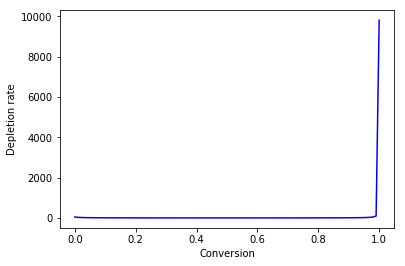

In [707]:
plt.figure(1)
plt.plot(xspan, rate, color='blue', label='-1/rA')
plt.ylabel('Depletion rate') 
plt.xlabel('Conversion') 
plt.show()

From the above Levenspiel diagram, the best series reactors is a CSTR is fit so that it fits on the minimum of the graph, followed by a PFR to $85~\%$ conversion. This will minimise the total volume required.

In [708]:
MaxRate = min(rate)
MaxRate

3.844675160442388

In [709]:
i = argmax(-rate==max(-rate))
Xmin = xspan[i]
print('CSTR Conversion = '+str(Xmin*100)+'%')

CSTR Conversion = 48.9951%


Now that we have the conversion rate of the CSTR, we can use this to calculate rA to apply to the CSTR design equation to calculate the volume of this CSTR.

In [710]:
Xcstr  = Xmin
rAcstr = -k*CAo*(1 - Xcstr)*(CPo + CAo*Xcstr)
rAcstr

-0.260099997599

In [711]:
Vcstr = Q*CAo*Xcstr/(-rAcstr)
print('CSTR Volume = '+str(Vcstr)+' L')

CSTR Volume = 4.709256098834771 L


Next, the inlet concentration for the PFR will be the same as the outlet concentration of the CSTR:

In [712]:
CAo1 = CAo*(1 - Xcstr)
CPo1 = (CPo + CAo*Xcstr)
print('CSTR outlet concentration A = '+str(CAo1)+' molA/L')
print('CSTR outlet concentration P = '+str(CPo1)+' molP/L')

CSTR outlet concentration A = 0.510049 molA/L
CSTR outlet concentration P = 0.509951 molP/L


The above outlet will be pumped into the PFR.

Since the total conversion is given, and we now know the conversion of the CSTR, we can calculate what the conversion of the PFR needs to be:

In [713]:
(0.51-0.15)/0.51

0.7058823529411764

For $85\%$ overall conversion we know that $C_{A_{out}} = 0.15~mol/L$ therefore:
\begin{align}
X_{2} &= \dfrac{C_{A1_{0}} - C_{A_{out}}}{C_{A1_{0}}} \nonumber \\
&= \dfrac{0.51 - 0.15}{0.51} \nonumber \\
&= 0.71 \nonumber
\end{align}

In [714]:
Vpfr = 4.31
Vspan1 = linspace(0,Vpfr, 100) #keep changing volume until X=85%
init1 = [CAo1, CPo1]
sols1 = odeint(PFR, init1, Vspan1)

CA1, CP1 = sols1.T
X2 = (CAo1 - CA1[-1])/CAo1
X2

0.7060183941932023

In [715]:
print('PFR Volume = '+str(Vpfr)+' L')

PFR Volume = 4.31 L


In [716]:
# Total volume therefore:
Vtotal = Vcstr + Vpfr
Vtotal

9.01925609883477

Volume of the CSTR is $4.71~L$, volume of the PFR is $4.31~L$.

Total reactor volume required is $9.02~L$

**f) Test your skills: Determine the reactor volume for which both a CSTR and a PFR will give the same conversion. Report the conversion as well as that reactor volume.**

So, what I understand from this question, it is asking what V = Vcstr = Vpfr, which will give the same conversion, i.e. X = Xcstr = Xpfr

In [717]:
Xfspan  = linspace(0.1, 0.9, 100)
Volume  = []
PFRconv = []

for vals in Xfspan:
    Xcstr = vals
    rAcstr  = -k*CAo*(1 - Xcstr)*(CPo + CAo*Xcstr)
    V2       = Q*CAo*Xcstr/(-rAcstr)
    
    def PFR2 (C,V):
        CA, CP = C
        rA     = -k*CA*CP
        rP     = -rA
        dCAdV  = rA/Q
        dCPdV  = rP/Q
        return[dCAdV, dCPdV]
    
    
    vspan   = linspace(0, V2, 100)
    init2   = [CAo, CPo]
    ans2    = odeint(PFR2, init2, vspan)
    
    CA2, CP2  = ans2.T
    Xpfr    = (CAo - CA2[-1])/CAo
    
    Volume.append(V2)
    PFRconv.append(Xpfr)
    
    
    
    

The initial conversion spread was done from 0 to 0.999. I managed to get a figure and seeing where the two conversion curves for the CSTR and PFR intersected, I changed the conversion spread to narrow down the graph. I probably could've added the scale to the plot but it was easier just fiddling with the spread, Xfspan until the graph focussed on the intersection.

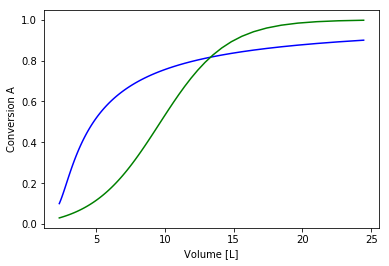

In [718]:
plt.figure(2)
plt.plot(Volume, Xfspan, color='blue', label='XAcstr')
plt.plot(Volume, PFRconv, color='green', label='XApfr')
plt.ylabel('Conversion A') 
plt.xlabel('Volume [L]') 
plt.show()

Visualising with a graph is sometimes easier, so I decided to make another graph of the difference between the two reactor conversions. Obviously, I would now want the volume where the new curve equals to zero, but since there are two zeroes, one in the beginning and one I am interested in, I changed the spread on Xfspan to start at 0.1. Then I can simply used the numpy interp command to get the volume at the zero.

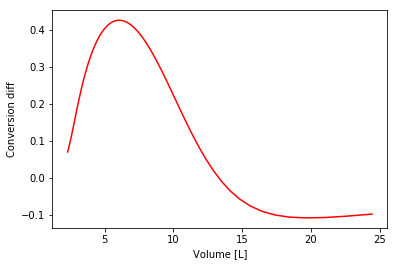

In [719]:
plt.figure(3)
diff = Xfspan-PFRconv
plt.plot(Volume, diff , color='red')
plt.ylabel('Conversion diff') 
plt.xlabel('Volume [L]') 
plt.show()

In [720]:
Vf = interp(0.00,diff[::-1],Volume[::-1])
print ('The volume of each reactor = ' +str(Vf) + 'L')

The volume of each reactor = 13.319371863312087L


In [721]:
# detect intersection by change in sign of difference
#d = Xfspan - PFRconv
#for i in range(len(d) - 1 ):
#    if d[i] == 0. or d[i] * d[i + 1] < 0.:
        # crossover at i
#        Vf = Volume[i]

In [722]:
#Vf  I didn't get the correct answer. It was a bit low. Didn't feel like exploring this path further. Opted for an easier method

Now that I have the volume, lets test the overall conversion for the CSTR and PFR respectively. If I get the same conversion, then I know I have the correct answer.

In [723]:
Vrx = linspace(0, Vf, 100)
init = [CAo, CPo]

PFRans = odeint(PFR, init, Vrx)
CA, CP = PFRans.T

Xpfr = (CAo - CA[-1])/CAo
print('The PFR conversion = '+str(Xpfr*100)+'% ')

The PFR conversion = 81.72914326939019% 


Now plug this in to the CSTR rate and design formulae to see if we get the same volume.

In [724]:
rAcstrf  = -k*CAo*(1 - Xpfr)*(CPo + CAo*Xpfr)
Vnew     = Q*CAo*Xpfr/(-rAcstrf)
print('The CSTR volume= '+str(Vnew)+'L')

The CSTR volume= 13.356153309847153L


$Vf = 13.32L \approx 13.36L = Vnew$

So lets say the common Volume is $13.34L$ for each of the reactors respectively to have an equal conversion of $X_{A} = 81.73\%$

--------------------------------------------------------------------------------------------------

Notes:

- Use scipy.integrate.solve_ivp (or import solve_ivp from scipy.integrate) to solve for the volume of the PFR reactor. Use an event function to find the volume where the conversion reaches the specified value.
- To find the maximum value in an array of values – like rates calculated at different conversion (𝑥𝑥) values, use maxrate = numpy.max(rates). To find the corresponding 𝑥𝑥-value at that maximum rate, use indexing: x_at_max = x[rates==maxrate]
- Be careful of “confusion of variables” if you choose to have one single notebook file for your entire problem. Re-using the same variable name in different sections can result in “unexplainable errors” if you are not diligent.


**What follows is Elizbe's suggested method using solve_ivp for the PFR**

In [725]:
fao = Q*CAo
fpo = Q*CPo
def DEs(v,var):
    fa, fp = var
    ca = fa/Q
    cp = fp/Q
    ra = -k*ca*cp
    rp = -ra
    dfadv = ra
    dfpdv = rp
    return [dfadv, dfpdv]

def event_85(v,var):
    fa, fp = var
    fatarget = fao*(1-X)
    return fa - fatarget

def stop_at_90(v,var):
    fa, fp = var
    xfin = 0.9 #I want the integration to stop when conversion is 90%
    fafin = fao*(1-xfin)
    return fa - fafin

stop_at_90.terminal = True

vrange = [0,20]
init = [fao,fpo]
answer = solve_ivp(DEs, vrange, init, events = [event_85, stop_at_90], dense_output = True)
answer

  message: 'A termination event occurred.'
     nfev: 56
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000002BDE25BEDD8>
   status: 1
  success: True
        t: array([ 0.        ,  0.12923882,  1.42162701,  4.40302253,  8.18995302,
       12.65969089, 14.70585249, 15.02164668])
 t_events: [array([13.89094149]), array([15.02164668])]
        y: array([[2.5       , 2.49734868, 2.46205132, 2.2756072 , 1.62800815,
        0.56548839, 0.28061043, 0.25      ],
       [0.05      , 0.05265132, 0.08794868, 0.2743928 , 0.92199185,
        1.98451161, 2.26938957, 2.3       ]])

In [726]:
v_pfr = float(answer.t_events[0])
print(f' The volume of a PFR to convert {X} of A = {round(v_pfr,1)} L')

 The volume of a PFR to convert 0.85 of A = 13.9 L


Text(0.5, 0, 'V in $L$')

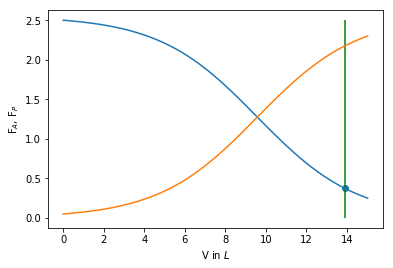

In [727]:
#show how to get values for fa and fp from solve_ivp: ask it to interpolate at a range of v
#values. dense_output = True must be an option in the function
#use the .sol attribute to get the y values (in this case fa and fp) at the specified t values
#in this case the specified vspan
vtot   = float(answer.t_events[1])
vspan  = linspace(0,vtot)
fa, fp = answer.sol(vspan)
plt.plot(vspan, fa, vspan, fp)
plt.scatter(v_pfr, fao*(1-X))
plt.ylabel('F$_{A}$, F$_{P}$')
plt.vlines(x = v_pfr, ymin = 0, ymax = fao, color = 'green')
plt.xlabel('V in $L$')
#note the inflection in the Fa and Fp slopes where the rate is at a maximum